# Hiyerarşik Kümeleme

Amaç, gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır.

![](image02.png)

![image.png](image03.png)

![image.png](image04.png)

![image.png](image05.png)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:, 0]
df = df.iloc[:, 1:5]
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Farklı bağlantı yöntemleri (linkage methods)
hc_complete = linkage(df, method="complete")
hc_average  = linkage(df, method="average")
hc_single   = linkage(df, method="single")

**linkage(df, method="complete")**  
Hiyerarşik kümeleme yaparken kümeler arası mesafeyi en uzak iki noktanın mesafesine göre hesaplar. Buna complete linkage denir.
Yani kümeleri birleştirirken “en uzak elemanların mesafesi” baz alınır.

**linkage(df, method="average")**  
Kümeler arasındaki mesafeyi hesaplamak için iki kümedeki elemanların ortalama mesafesini alır.

**linkage(df, method="single")**  
Kümeler arasındaki mesafe, iki kümedeki elemanlardan en yakın olan iki noktanın mesafesi ile belirlenir.

**dendrogram(...)**  
Hiyerarşik kümeleme sonucunu görselleştiren ağaç yapısıdır.
X ekseninde veri indeksleri, Y ekseninde kümelerin birleşme uzaklıkları gösterilir.

**leaf_font_size=10**  
X eksenindeki etiketlerin (veri noktalarının) yazı boyutunu küçültür ki uzun veri isimleri birbirine girmesin.

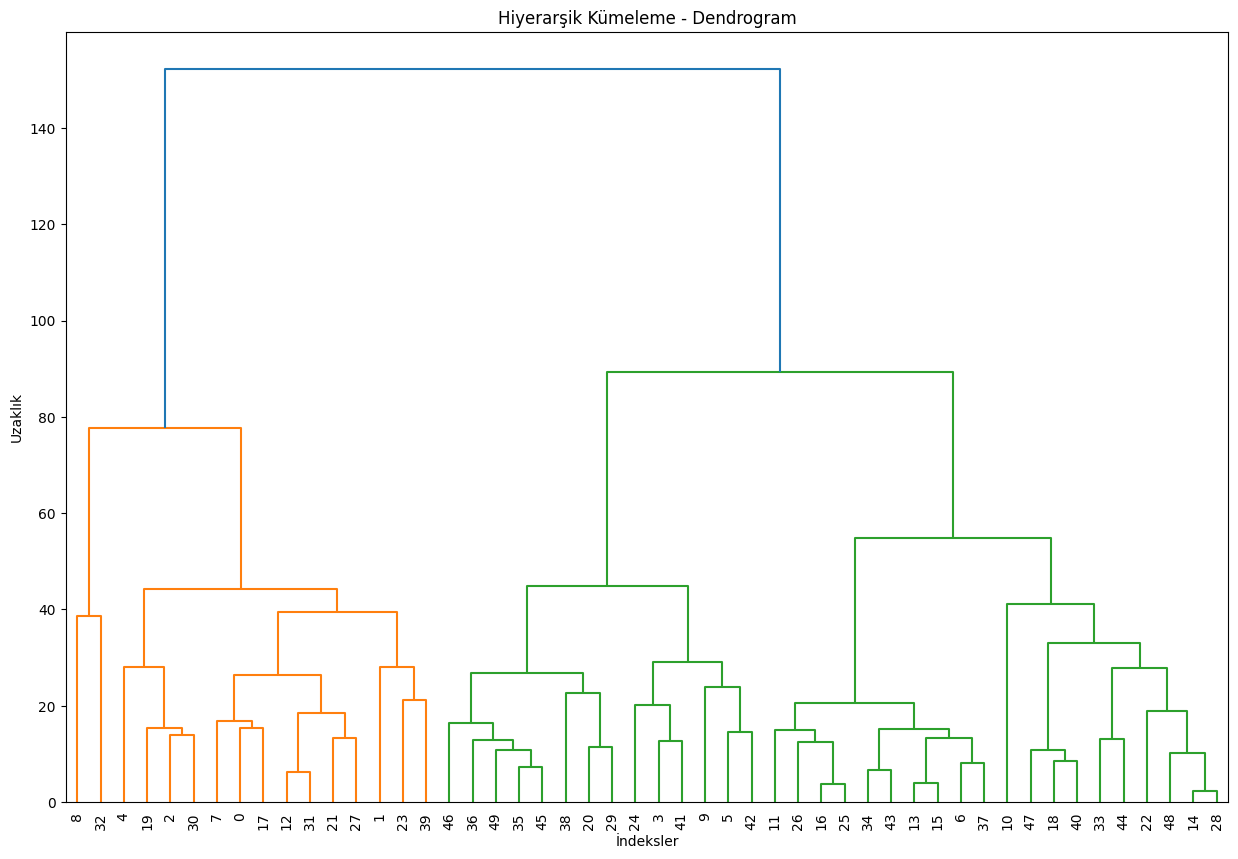

In [10]:
# Dendrogram çizimi
plt.figure(figsize=(15, 10))
plt.title("Hiyerarşik Kümeleme - Dendrogram")
plt.xlabel("İndeksler")
plt.ylabel("Uzaklık")

dendrogram(
    hc_average,   # average linkage ile oluşturulmuş sonuç
    leaf_font_size=10
)
plt.show()

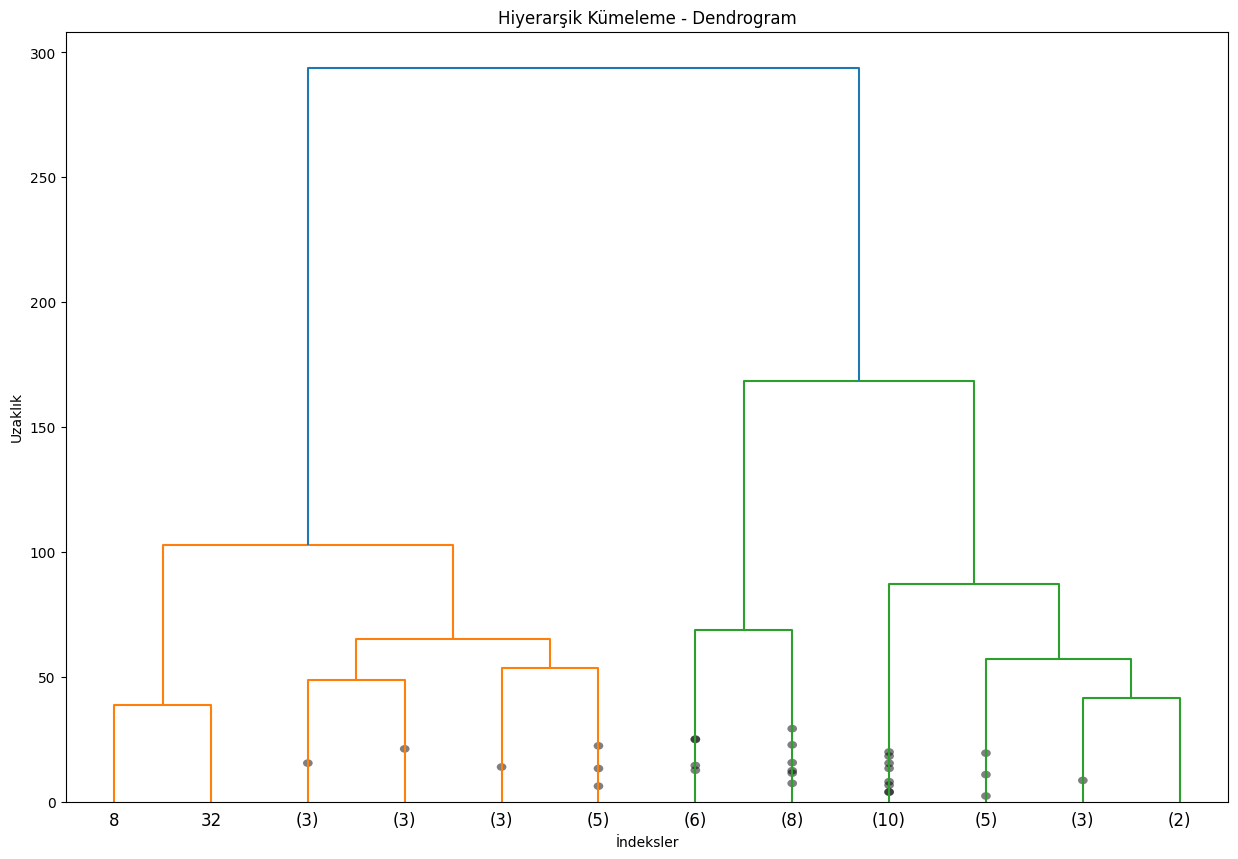

In [11]:
# Dendrogram çizimi
plt.figure(figsize=(15, 10))
plt.title("Hiyerarşik Kümeleme - Dendrogram")
plt.xlabel("İndeksler")
plt.ylabel("Uzaklık")

dendrogram(
    hc_complete,
    truncate_mode="lastp", 
    p=12, 
    show_contracted=True
)
plt.show()

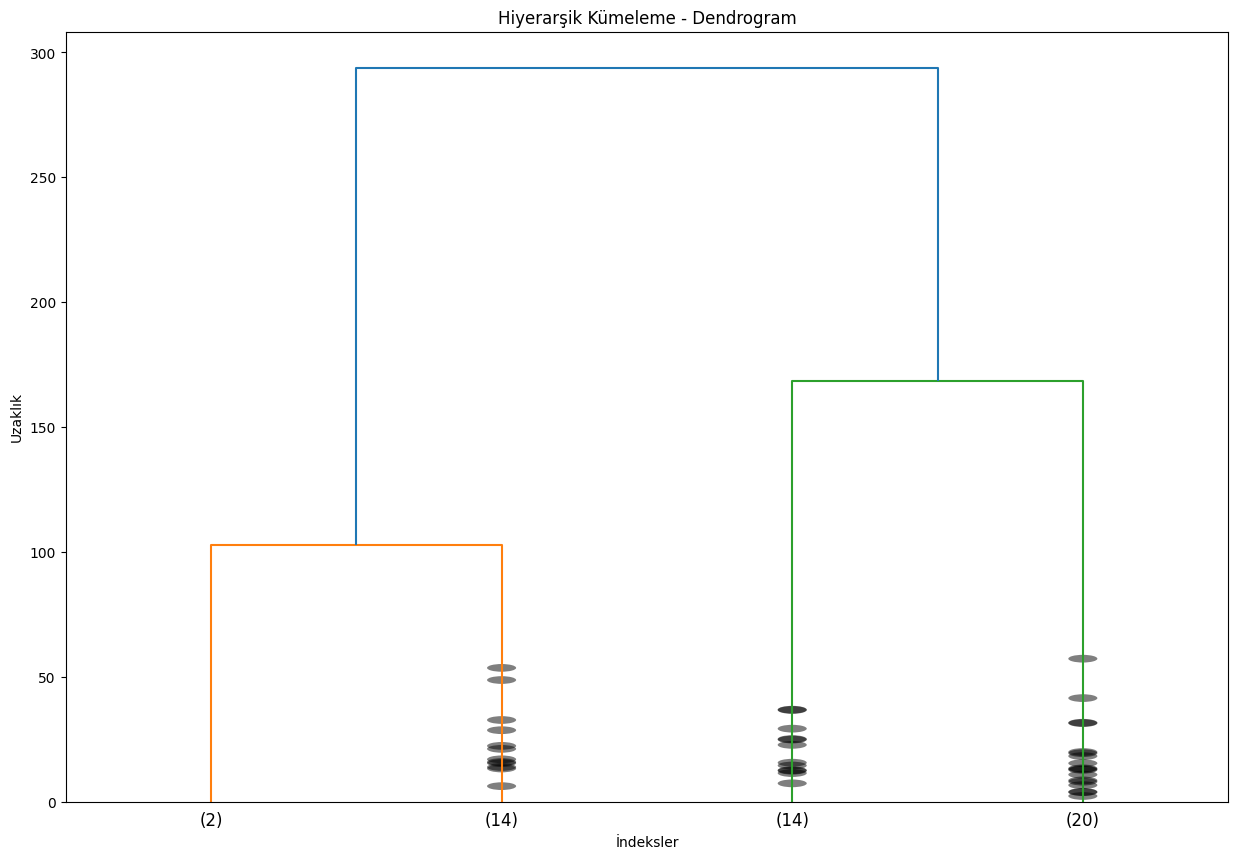

In [16]:
# Dendrogram çizimi
plt.figure(figsize=(15, 10))
plt.title("Hiyerarşik Kümeleme - Dendrogram")
plt.xlabel("İndeksler")
plt.ylabel("Uzaklık")

dendrogram(
    hc_complete,
    truncate_mode="lastp", 
    p=4, 
    show_contracted=True
)
plt.show()

### Optimum Küme Sayısı

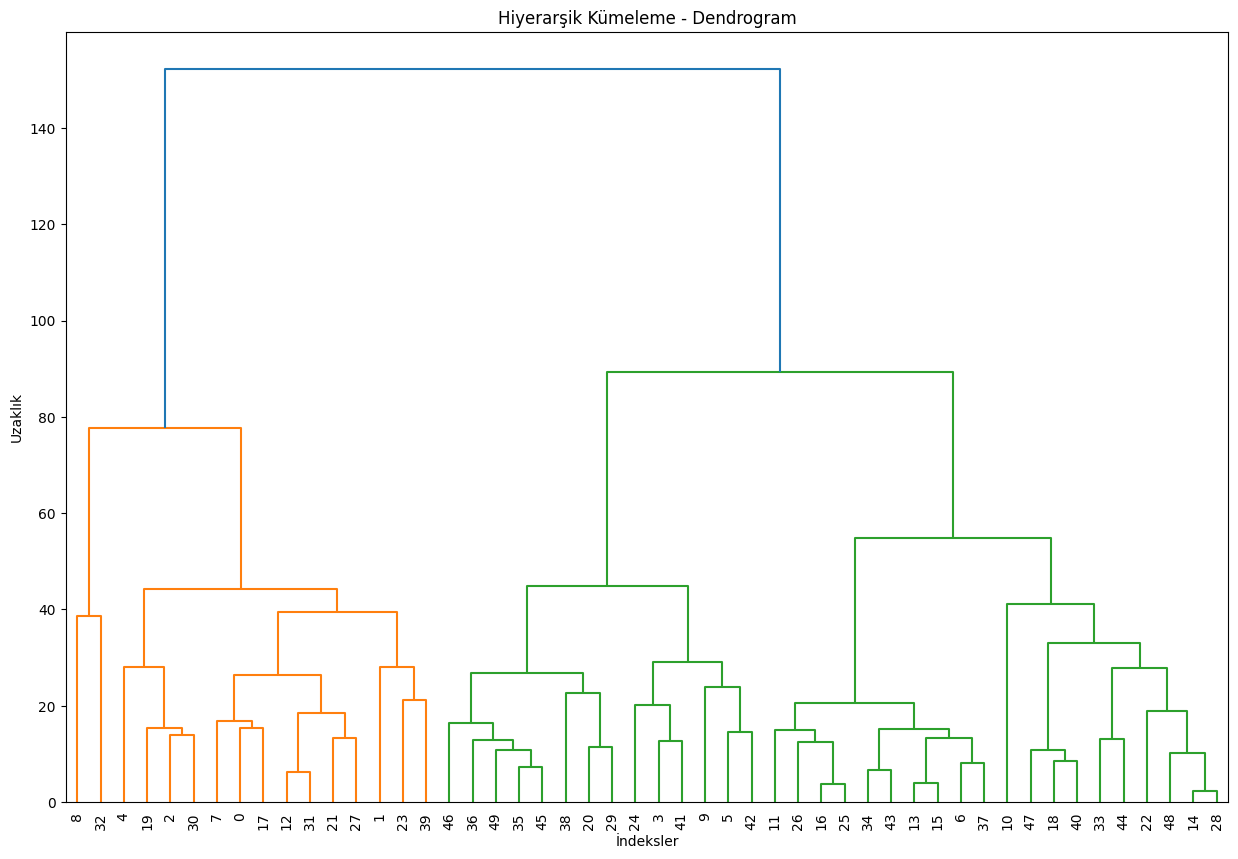

In [17]:
# Dendrogram çizimi
plt.figure(figsize=(15, 10))
plt.title("Hiyerarşik Kümeleme - Dendrogram")
plt.xlabel("İndeksler")
plt.ylabel("Uzaklık")

dendrogram(
    hc_average,   # average linkage ile oluşturulmuş sonuç
    leaf_font_size=10
)
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, 
                                  metric="euclidean", 
                                  linkage="ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [21]:
df['kume_no'] = cluster.fit_predict(df)

In [22]:
df.head()

,Murder,Assault,UrbanPop,Rape,kume_no
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


🔹 fit
* Modeli veriyle eğitir, yani yapıyı öğrenir (parametreleri, merkezleri, dendrogram vs. çıkarır).
* Sadece öğrenme aşaması yapılır, etiket ya da dönüştürülmüş veri vermez.

Örn:
cluster.fit(df)

🔹 predict
* Bazı algoritmalarda fitten sonra yeni verilere etiket verir.
* Ama AgglomerativeClustering’de predict yoktur, fit_predict kullanılır.


🔹 fit_predict
* Hem öğrenir hem de küme etiketlerini döndürür.
* Yani fit + predict birleşimi gibidir.
* Senin kullandığın doğru yöntem bu çünkü direkt etiketleri elde etmek istiyorsun.


🔹 fit_transform
* fit yapar (modeli öğrenir), sonra da veriyi dönüştürür.
* Bu daha çok ölçekleme (StandardScaler, MinMaxScaler) veya boyut indirgeme (PCA, t-SNE) gibi yöntemlerde kullanılır.